In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [44]:
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

In [45]:
df = pd.read_csv("C:/Users/ajith/Bharath IBM/ckd.xls")

In [46]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [47]:
df['wc']

0      7800
1      6000
2      7500
3      6700
4      7300
       ... 
395    6700
396    7800
397    6600
398    7200
399    6800
Name: wc, Length: 400, dtype: object

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [49]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [50]:
df[df.duplicated()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [51]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [52]:
df2 = df.dropna(axis=0)

In [53]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)

In [54]:
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [55]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
df2 = df.dropna(axis=0)

In [57]:
df2['class'].value_counts()

0.0    115
1.0     43
Name: class, dtype: int64

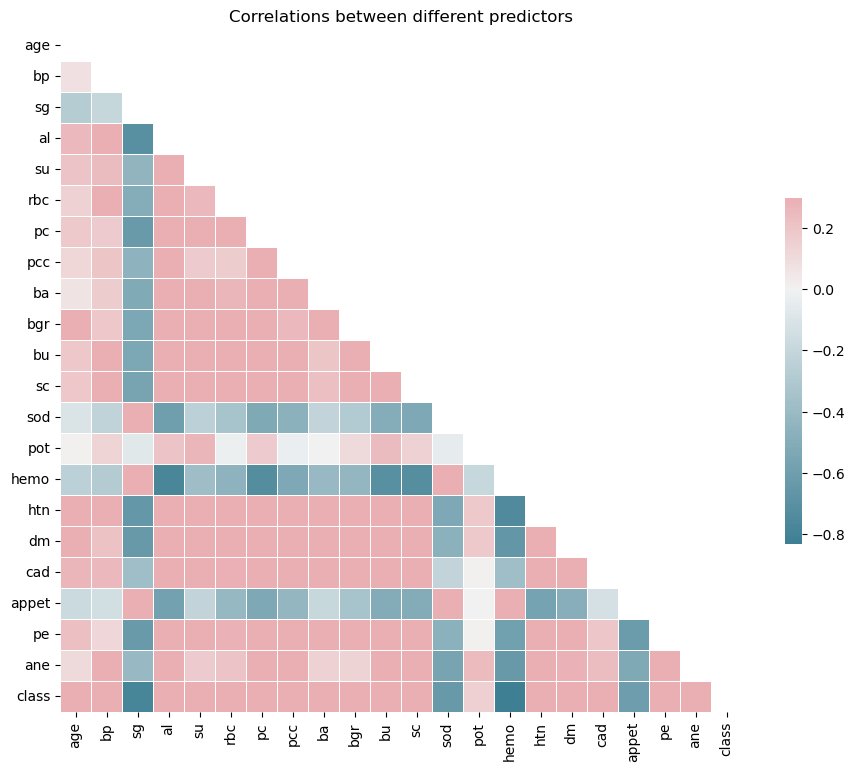

In [58]:
corr_df = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2['class'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= df2['class'] )

In [60]:
X_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
317,58.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,102.0,...,15.0,40,8100,4.9,0.0,0.0,0.0,1.0,0.0,0.0
296,41.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,125.0,...,16.8,41,6300,5.9,0.0,0.0,0.0,1.0,0.0,0.0
157,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,12.6,39,7900,3.9,1.0,1.0,0.0,1.0,0.0,0.0
258,42.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,98.0,...,13.9,44,8400,5.5,0.0,0.0,0.0,1.0,0.0,0.0
291,47.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,124.0,...,14.9,41,7000,5.7,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
print(X_train.shape)
print(X_test.shape)

(105, 24)
(53, 24)


In [62]:
y_train.value_counts()

0.0    76
1.0    29
Name: class, dtype: int64

Detailed classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

Confusion Matrix:
[[39  0]
 [ 0 14]]


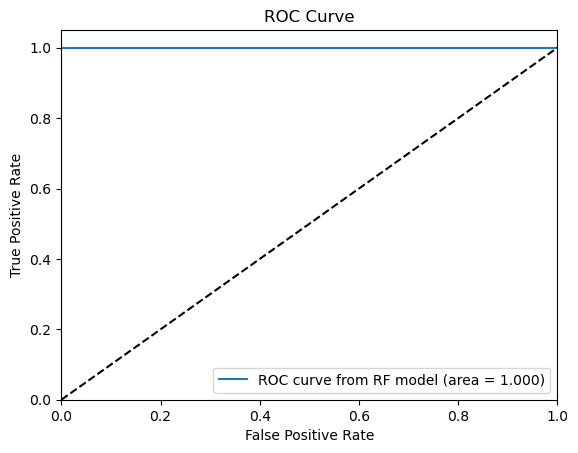

Best parameters:
{'class_weight': None, 'max_depth': 2, 'n_estimators': 8, 'random_state': 42}


In [63]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_

Text(0.5, 1.0, 'Feature Importance')

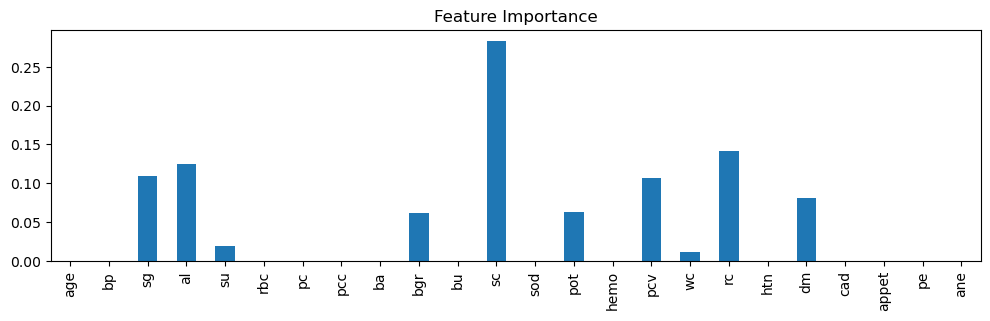

In [64]:
plt.figure(figsize=(12,3))
features = X_test.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

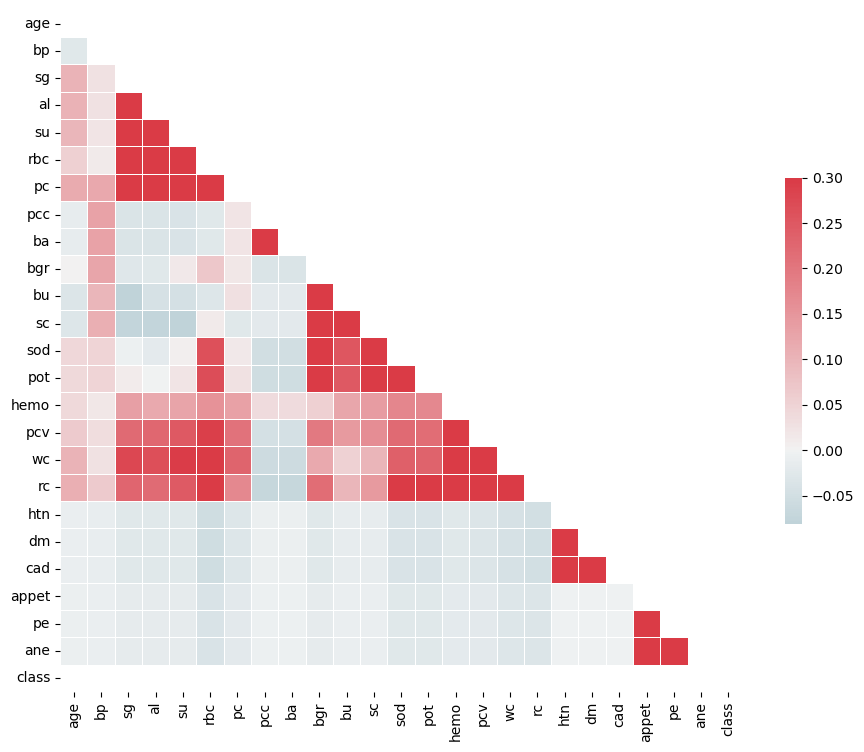

In [65]:
# Are there correlation in missing values?
corr_df = pd.isnull(df).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

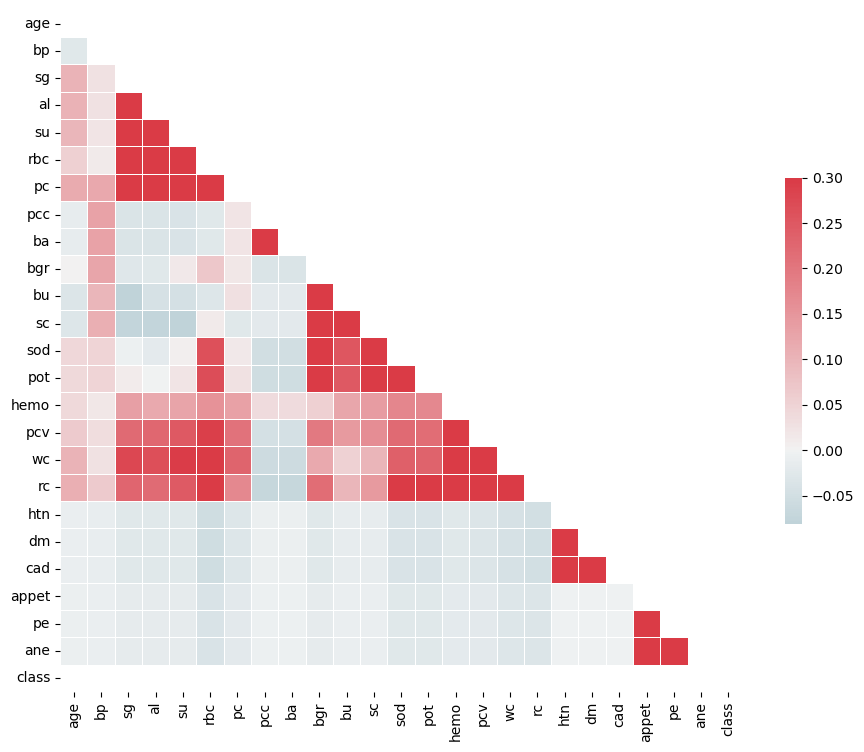

In [66]:
# Are there correlation in missing values?
corr_df = pd.isnull(df).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

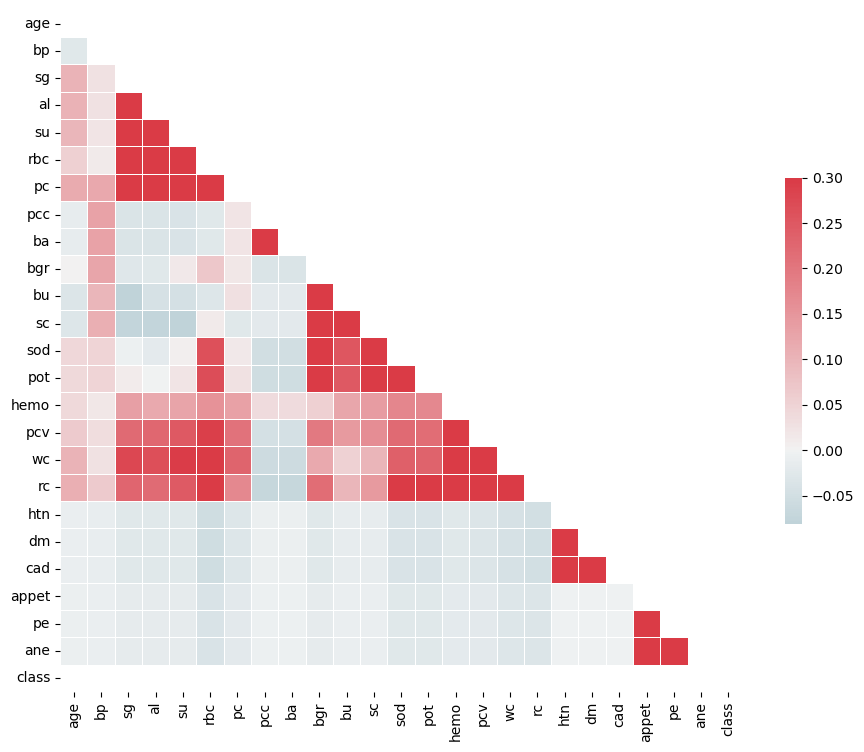

In [67]:
# Are there correlation in missing values?
corr_df = pd.isnull(df).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72        35
         1.0       1.00      0.87      0.93       207

    accuracy                           0.89       242
   macro avg       0.78      0.93      0.83       242
weighted avg       0.94      0.89      0.90       242

Confusion Matrix:
[[ 35   0]
 [ 27 180]]
Accuracy: 0.888430


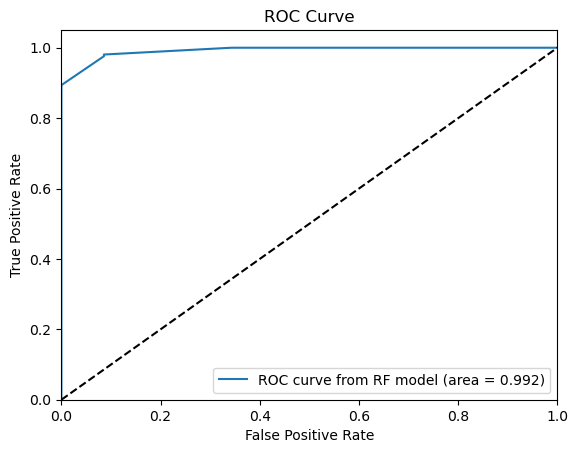

In [68]:
df2 = df.dropna(axis=0)
no_na = df2.index.tolist()
some_na = df.drop(no_na).apply(lambda x: pd.to_numeric(x,errors='coerce'))
some_na = some_na.fillna(0) # Fill up all Nan by zero.

X_test = some_na.iloc[:,:-1]
y_test = some_na['class']
y_true = y_test
lr_pred = clf_best.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

print('Accuracy: %3f' % accuracy_score(y_true, lr_pred))
# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf_best, X_test, y_test, 'RF')

In [69]:
import pickle
pickle. dump(clf_best, open('randomclass_chronic', 'wb'))

In [70]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
y_pred=reg.predict(X_test)

In [72]:
pickle. dump(reg, open('randomreg_chronic', 'wb'))

In [73]:
y_pred

array([0.58, 0.8 , 1.  , 0.79, 0.8 , 0.3 , 0.75, 1.  , 1.  , 1.  , 0.31,
       1.  , 0.99, 0.31, 0.1 , 0.89, 0.31, 0.11, 0.79, 0.31, 0.31, 0.69,
       0.63, 0.31, 1.  , 0.89, 1.  , 0.89, 0.99, 0.89, 0.31, 0.99, 0.91,
       1.  , 0.11, 0.1 , 0.89, 1.  , 1.  , 0.09, 0.7 , 1.  , 0.31, 1.  ,
       0.31, 0.  , 0.91, 0.8 , 1.  , 0.31, 0.31, 0.89, 0.89, 0.8 , 0.89,
       0.11, 0.59, 1.  , 0.8 , 1.  , 0.  , 0.  , 0.8 , 1.  , 0.69, 0.89,
       0.31, 0.78, 0.31, 0.31, 0.31, 0.69, 1.  , 0.31, 0.88, 0.99, 0.11,
       0.31, 0.69, 0.89, 0.89, 0.31, 0.11, 0.8 , 1.  , 0.21, 1.  , 0.31,
       0.2 , 0.31, 0.89, 0.11, 0.31, 0.3 , 1.  , 0.8 , 0.11, 1.  , 0.07,
       0.8 , 0.1 , 0.8 , 0.11, 0.88, 0.7 , 0.31, 0.7 , 0.31, 0.31, 0.3 ,
       0.69, 0.11, 0.31, 0.31, 0.04, 0.31, 1.  , 0.89, 1.  , 0.11, 0.89,
       0.31, 0.89, 1.  , 0.69, 0.31, 0.69, 0.76, 0.31, 0.11, 1.  , 1.  ,
       1.  , 1.  , 0.31, 0.69, 0.31, 0.31, 0.  , 0.11, 0.31, 0.07, 1.  ,
       0.31, 0.99, 0.88, 0.79, 0.3 , 0.31, 0.9 , 1.

In [74]:
l_pred=list(y_pred)

In [75]:
l_test=list(y_test)

In [76]:
d={'prob':l_pred,'out':y_test}

In [77]:
df_i=pd.DataFrame(d)

In [78]:
df_i.head()

,prob,out
0,0.58,1.0
1,0.80,1.0
2,1.00,1.0
4,0.79,1.0
5,0.80,1.0


In [79]:
df_i.to_csv('C:/Users/ajith/randomclass_chronic.csv')

In [80]:
import pickle
loaded_class = pickle. load(open('randomclass_chronic', 'rb'))
loaded_reg = pickle. load(open('randomreg_chronic', 'rb'))

In [81]:
import numpy as np

In [82]:
import pandas as pd

In [ ]:
from flask import Flask, request, redirect, render_template
app = Flask(__name__)
@app.route("/",methods=['GET', 'POST'])
def index():
    return render_template('index.html')
@app.route("/login")
def login():
    return render_template('login.html')
@app.route("/register")
def register():
    return render_template('register.html')
@app.route("/val",methods=['POST'])

# "age","bp","sg","al","su","rbc","pc","pcc","ba","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","htn","dm","cad",appet","pe","ane"
def val():
    test=[]
    if request.method == 'POST':
        test.append(request.form.get("age"))
        test.append(request.form.get("bp"))
        test.append(request.form.get("sg"))
        test.append(request.form.get("al"))
        test.append(request.form.get("su"))
        rb=request.form.get("rbc")
        if rb=='abnormal':
            test.append(1)
        else:
            test.append(0)
        pc=request.form.get("pc")
        if pc=='abnormal':
            test.append(1)
        else:
            test.append(0)
        pcc=request.form.get("pcc")
        if pcc=='present':
            test.append(1)
        else:
            test.append(0)
        ba=request.form.get("ba")
        if ba=='present':
            test.append(1)
        else:
            test.append(0)
        test.append(request.form.get("bgr"))
        test.append(request.form.get("bu"))
        test.append(request.form.get("sc"))
        test.append(request.form.get("sod"))
        test.append(request.form.get("pot"))
        test.append(request.form.get("hemo"))
        test.append(request.form.get("pcv"))
        test.append(request.form.get("wc"))
        test.append(request.form.get("rc"))
        ht=request.form.get("htn")
        if ht=='yes':
            test.append(1)
        else:
            test.append(0)
        d=request.form.get("dm")
        if d=='yes':
            test.append(1)
        else:
            test.append(0)
        ca=request.form.get("cad")
        if ca=='yes':
            test.append(1)
        else:
            test.append(0)
        ap=request.form.get("appet")
        if ap=='Good':
            test.append(1)
        elif ap=='Poor':
            test.append(0)
        else:
            test.append(np.nan)
        p=request.form.get("pe")
        if p=='yes':
            test.append(1)
        else:
            test.append(0)
        an=request.form.get("ane")
        if an=='yes':
            test.append(1)
        else:
            test.append(0)
    print(test)
    test_df=pd.DataFrame(test)
    test_df=np.array(test_df).reshape(1, -1)
    
    ans1=loaded_class.predict(test_df)
    ans2=loaded_reg.predict(test_df)
    if int(ans1)==1:
        answer1="Sorry to say!! You have CHRONIC DISEASE!!!"
        return render_template('rename.html',answer1=answer1,answer2=ans2)
    else:
        answer1="Happy to say that you don't have CHRONIC DISEASE"

        return render_template('rename2.html',answer1=answer1,answer2=ans2)
    
if __name__ == "__main__":
    app.debug=True
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2022-11-24 15:09:49,524] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\ajith\New folder\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\ajith\New folder\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\ajith\New folder\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\ajith\New folder\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\ajith\New folder\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\ajith\New folder\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\ajith\A